<img src='https://static01.nyt.com/images/2018/09/25/science/25BRODYHEART/merlin_143957100_aec3ac08-454e-4e4d-a358-962465a2934e-superJumbo.jpg' alt='Heart'>

# Risk factors for heart disease

## About this notebook
***

This notebook aims to simulate the **risk of a person developing heart disease** (our [dependent variable](https://www.verywellmind.com/what-is-a-dependent-variable-2795099)) based on 3 [independent variables](https://www.verywellmind.com/what-is-the-independent-variable-2795278):
1. The **number of cigarettes** the person smokes per day
2. The person's **Body Mass Index (BMI)**, calculated as the person's weight divided by their heights squared
3. The person's **total cholesterol** levels

Our task is to build a dataframe using simulated data for each of these variables. To 'mimic' the behaviour of the data, their likely distribution and nature, as well as the relationships between independent and dependent variables, however, we have to rely on real-world data - in our case, data collected for the famous [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study).

## The Framingham Heart Study
***

In the Autumn of 1948, a pioneer study on risk factors associated with developing heart disease kickstarted in the small town of Framingham, Massachussetts. Despite being the cause of roughly half of the deaths in the US in the early 1940's, cardiovascular disease was still poorly understood in terms of prevention and treatment \[1\]. So much so that some argue that even the then US President, Frankling D. Roosevelt could have lived longer if only his first signs of cardiovascular disease have been detected earlier \[1\].The Framingham Heart Study aimed at filling that knowledge gap and investigated which factors (behavioural, physiological, demographic etc) were playing a part in the development of heart disease.

In its first round, the study evaluated health parametres of 5,209 residents of the town, such as their dietary, exercising, and smoking habits, blood pressure, heart rate, age, and history of underlying conditions (e.g. diabetes, and/or strokes).

When the results of the study were published nine years later, in 1957, it was the first time that tobacco consumption, obesity, high cholesterol and high blood pressure were linked with a higher risk of someone developing cardiovascular disease \[2\]. Since then, the study was granted funding for additional rounds, evaluating these and other parametres among the children and grandchildren of the original cohorts. It is still being conducted to this day, having gathered and analysed epidemiological data from more than 15,000 individuals from three generations for more than 70 years \[3\].

## Requirements
***

### Importing required packages

For this project, we'll need to import `numpy`, from which we will use the `numpy.random` module to create arrays of random values. We'll also need `scipy.stats` for truncated normal distributions (by using it's built-in function `truncnorm`), `pandas` for creating and manipulating our dataframe, and `matplotlib.pyplot` for plotting.

In [1]:
#Arrays
import numpy as np

#Truncated normal distribution
import scipy.stats as stats

#Dataframes
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

## The real-world data
***

<p>As mentioned above, our simulated data will be informed by real-world data from the Framingham Heart Disease Study. We though, then, that it could be useful to have a quick look into the original data to see if we can find any patterns, determine some basic parametres for our variables (such as mean, santandard deviation, min and max values, etc.), and have a general understanding of the data.</p>

For that, we'll first load the data into a `pandas` dataframe.

**Data source:** https://www.kaggle.com/naveengowda16/logistic-regression-heart-disease-prediction/version/1

In [2]:
#Load dataset into pandas
original_df = pd.read_csv('data/framingham_heart_disease.csv')

#Show first 5 rows
original_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


The original dataset has a number of other variables that we won't consider for the purpose of this simulation. Here, we only need to understand the data about number of cigarettes smoked per day, total cholesterol, BMI, and the risk of developing a heart disease in ten years (TenYearCHD, where 1 means 'yes' and 0 means 'no'). First thing we need to do, then, is to drop all other columns and keep only those that are interesting to us. After that, we can use the `DataFrame.describe()` function in `pandas` to get more information about these data.

In [3]:
#Keep only our variables of interest
original_df = original_df[['cigsPerDay','totChol','BMI','TenYearCHD']]

#Describe variables
original_df.describe()

,cigsPerDay,totChol,BMI,TenYearCHD
count,4209.000000,4188.000000,4219.000000,4238.000000
mean,9.003089,236.721585,25.802008,0.151958
std,11.920094,44.590334,4.080111,0.359023
min,0.000000,107.000000,15.540000,0.000000
25%,0.000000,206.000000,23.070000,0.000000
50%,0.000000,234.000000,25.400000,0.000000
75%,20.000000,263.000000,28.040000,0.000000
max,70.000000,696.000000,56.800000,1.000000


Now that we know each variable's means, min and max values and standard deviations, we can try to plot them and see how their distributions look like.
We'll do this using the `fig,ax = plt.subplot()` method in `pyplot`, in which we define the attributes of our figure (`fig`) as well as our sets of axes (`ax1`, `ax2`, etc.) and plot a histogram of each variable using `plt.hist()`.

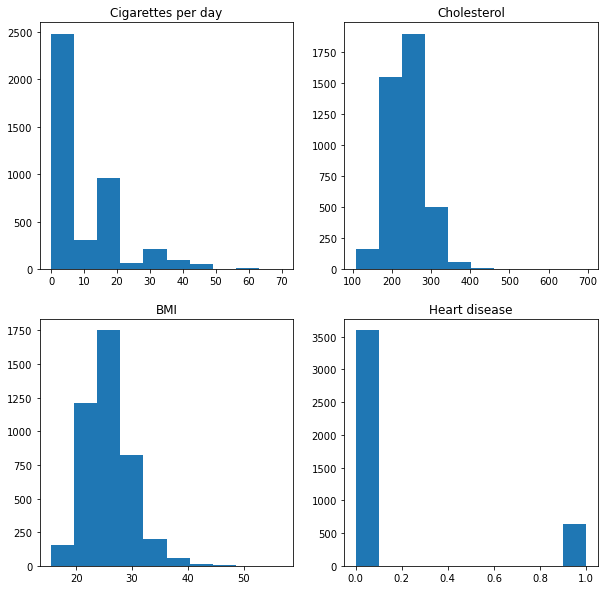

In [4]:
#Define subplots
fig,([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize = (10,10))

#Set variables
cigs = original_df['cigsPerDay']
totChol = original_df['totChol']
BMI = original_df['BMI']
TYCHD = original_df['TenYearCHD']



#Set plot titles
ax1.set_title('Cigarettes per day')
ax2.set_title('Cholesterol')
ax3.set_title('BMI')
ax4.set_title('Heart disease')


#What to plot in each ax
ax1.hist(cigs)
ax2.hist(totChol)
ax3.hist(BMI)
ax4.hist(TYCHD)

plt.show()


## Simulating data
***

<p>Data simulation is a process of generating random data following stochastic - or random - processes (i.e. processes of collecting random variables that are indexed against another variable or set of variables) [4][5]. Running a simulation is useful when you know the nature and the likely behaviour of different variables in a given system, but want to understand their interdependencies, how they impact a given outcome, or to test the validity of a model or an algorithm.</p>

<br>

## Independent variables
***

<br>

### Cigarettes per day

<p>Cigarettes are now known as a common risk factor for developing heart disease, with approximately a fifth of all deaths from heart disease in the US directly linked to smoking habits [6]. Not only that, but the risk of developing heart disease increases significantly according to the number of cigarettes a person smokes per day. For instance, someone who smokes a pack of cigarettes every day (i.e. 20 cigarettes per day) has twice the chance of developing heart disease compared to a non-smoker [6].</p>

Real-world data from the Framingham study indicate that out of their 5,209 people sample, most smoked up to 5 cigarettes a day, with another peak at between 15 and 20 cigarettes per day. Very few people smoked a number of cigarettes outside of these parametres. To emulate this, we made approximations for observations above 10 cigarettes per day, considering only 10, 15, 20, 25, 30, and then 40, 50, 60, and 70 (our values for `a`). Per se, the number of cigarettes one can smoke in a day cannot be considered [discrete data](https://www.thedrum.com/profile/whatagraph/news/discrete-vs-continuous-data-whats-the-difference#:~:text=Discrete%20data%20is%20a%20count,%2C%20and%20non%2Dnegative%20integers.), as one can smoke half or 3/4 of a cigarette every day. We looked at it as dicrete only to simplify our probabilities (`p`) - otherwise, we'll end up with a non-unifom distributed array of 70 random probabilities which does not correspond to the data observed in the real-world.

Our variable `cigs_per_day` is then an array of 5,209 randomly picked values from the array `a`, each corresponding to a probability of happening `p`. This was done using the `np.random.choice()` function, which generates a random sample of a given 1-D array following a specified distribution (or a uniform distribution if `p` is not given) \[7\].

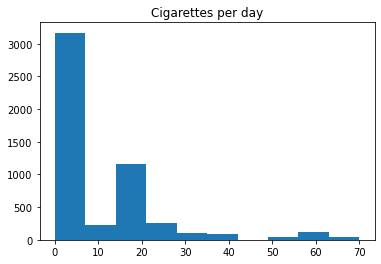

In [5]:
#Number of possible cigarettes per day
a = np.array([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,70])

#Probability, based on real-world data
p = np.array([0.2,0.1,0.1,0.1,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.2,0.05,0.02,0.02,0.01,0.02,0.01])

#Random array of 5209 values based on a and p
cigs_per_day = np.random.choice(a=a, size=5209, p=p)

plt.title('Cigarettes per day')
plt.hist(cigs_per_day)
plt.show()

<br>

### Cholesterol

Cholesterol refers to lypids naturally produced by the liver and ingested through a fat rich diet. There is 'good' (HDL) and 'bad' (LDL) cholesterol, which can clean up and build up in a person's arteries, respectively \[8\]. Total cholesterol includes both. Various factors can affect the cholesterol levels of a person, such as diet, exercise, smoking habits, so the total cholesterol is a good indicator of the person's overall health \[9\].

Healthy levels of cholesterol vary according to the person's age, sex, underlying conditions, dietary and lifestyle habits, but a useful approximation can be given by the table below:

| Total cholesterol  | Category         |
|   :-------------:  |  :-------------: |
| Less than 200      | Desirable        |
| 200 - 239          | Borderline high  |
| 240 - 350          | High             |
| Above 350          | Critically high  |

**Source:** [webmd.com](https://www.webmd.com/heart-disease/guide/heart-disease-lower-cholesterol-risk)

Again, here we simplified real-world observations and considered that cholesterol levels follow a normal distribution centred around 237 and with a stardard deviation of about 45 (values taken from the description of the original dataset). However, we noticed that cholesterol levels are all integers (discrete data), whist `np.random.normal()` would return an array of floats. A workaround - not ideal, but sufficient for our purpose - was to round the random array to have only integers in our variable `chol`. We did that using `np.round()` \[10\]\[11\].

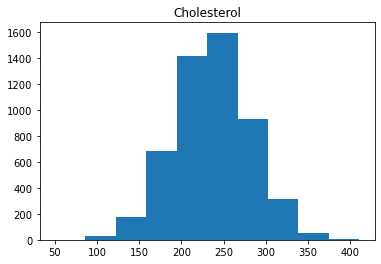

In [6]:
#Normal distribution based on real-world data description
randomFloats = np.random.normal(237,45, size=(5209))

#Cholesterol has only round values
chol = np.round(randomFloats)

plt.title('Cholesterol')
plt.hist(chol)
plt.show()

<br>

### Body Mass Index (BMI)

The Body Mass Index (BMI) is a weight-based measure that can indicate the level of body fatness of a person - that is, based on the person's weight and height, it indicates whether s/he is underweight, overweight, or within a normal weight, as well as the degree of under or overweightness. The BMI is measured by dividig a person's weight in kilograms by their squared height in metres \[12\].

The table below provides some parametres for evaluating BMI:

| BMI         | Weight status |
| :---------: | :-----------: |
| Below 18.5  | Underweight   |
| 18.5 - 24.9 | Healthy       |
| 25 - 29.9   | Overweight    |
| 30 and above| Obese         |

**Source:** [cdc.gov](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/english_bmi_calculator/bmi_calculator.html)

Obesity, which can be quantified by a BMI above 30, is known to significantly increase the risk of heart disease \[13\].

Our reference real-world data showed a peak between 25-30, indicating that the majority of the sample was, according to the table above, overweight. To mimic the data on BMI, we considered that it followed a truncated normal distribution (i.e., a normal distribution bounded by lower and upper values). We also know that BMI is continuous data, so it accepts floats as values, that our data had a max value of 56.8 (`upper`), a min of 15.54 (`lower`), a mean of 25 (`mu`), and a std of 4.08 (`sigma`).

With these numbers, plus the size of the sample, we got our random BMI values using the `stats.truncnorm.rvs()` function \[14\].

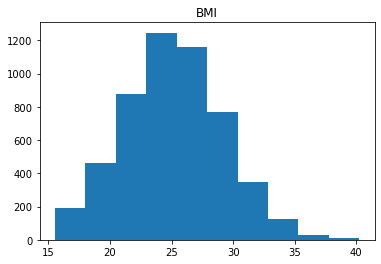

In [7]:
#Define boundaries, mean, std, and sample size
lower = 15.54
upper = 56.8
mu = 25
sigma = 4.08
sample = 5209

#Random variates with truncated normal distribution
bmi = stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=sample)


plt.title('BMI')
plt.hist(bmi)

plt.show()

<br>

## Dependent variable: Risk of heart disease
***

There are many possible approaches to create an array of values that correlate with the other values we've already defined. For this project, we chose to create a `pandas` dataframe with the 3 random arrays that we have for the independent variables (`cigs_per_day`, `chol`, and `bmi`), and then add a new column with values that will depend on multiple conditions - or multiple combinations of values for the 3 other variables in a given row \[15\].

First things first, let's create the dataframe:

<br>

### Creating the `pandas` dataframe

To create a dataframe from a dict of numpy arrays, we need them to be of the same length. As we've set all arrays to have the same size (5209), we can safely use this method \[16\].

In [8]:
#Pass a dict of numpy arrays
data = {'Cigarettes per day': cigs_per_day,
        'Cholesterol': chol,
        'BMI': bmi
        }

#Load into dataframe
df = pd.DataFrame(data)

#Show a sample of 5 random rows
df.sample(5)


,Cigarettes per day,Cholesterol,BMI
5019,0,247.0,24.225234
1578,20,189.0,19.547339
2768,6,182.0,25.374458
1121,4,301.0,26.894490
361,0,301.0,28.191134


<br>

### Adding dependent variable (Risk)

Individuals at risk of developing heart disease are typically:
* People with high colesterol levels (Cholesterol >=350)
* Obese (BMI >= 30).
* Heavy smokers (Cigarettes per day >= 20).
* A combination of these factors

Our list of conditions tries to capture these. For example, `df['Cigarettes per day'] >= 20` picks all rows where the value for column 'Cigarettes per day' is equal to or greater than 20. Similarly, `df['BMI'] >= 30` picks all rows where the value for column 'BMI' is greater than 30.

In [9]:
#Define list of conditions

conditions = [
    (df['Cigarettes per day'] >= 20) & (df['BMI'] >= 30) & (df['Cholesterol'] >= 350),
    (df['BMI'] >= 30) & (df['Cholesterol'] >= 350),
    (df['Cigarettes per day'] >= 20) & (df['BMI'] >= 30),
    (df['Cigarettes per day'] >= 20) & (df['Cholesterol'] >= 350),
    (df['Cholesterol'] >= 350),
    (df['BMI'] >= 30),
    (df['Cigarettes per day'] >= 20),
]

We then match these conditions with possible values for the new column and store them into a list `risk`. Note that `len(risk)` has to be the same as `len(conditions)`, otherwise the argument `choicelist` (here `risk`) won't work \[17\].

In [14]:
#Set values for new column according to conditions
risk = [1,1,1,1,1,1,1]

#Add new column based on conditions and risk
tyhd = np.select(conditions, risk, default=0)
df['Risk of heart disease'] = tyhd

#Show sample of 5 random rows
df

,Cigarettes per day,Cholesterol,BMI,Risk of heart disease
0,0,299.0,21.040715,0
1,2,213.0,29.034871,0
2,5,270.0,18.065174,0
3,30,220.0,18.066243,1
4,20,214.0,29.972704,1
...,...,...,...,...
5204,2,194.0,22.631804,0
5205,20,144.0,25.088824,1
5206,1,338.0,29.031486,0
5207,1,242.0,32.697544,1


Finally, we can count how many times each unique value appears in the new column using `DataFrame.value_counts()`, and selecting the new column 'Risk of heart disease'.

In [15]:
#Count instances of each unique value
df['Risk of heart disease'].value_counts()

0    3028
1    2181
Name: Risk of heart disease, dtype: int64

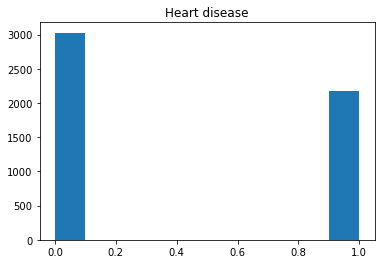

In [16]:
#Plot the risk of developing heart disease
plt.title('Heart disease')
plt.hist(tyhd)
plt.show()

## Discussion
***

One of the main difficulties in running this simulation was the lack of a strong (if any) linear correlation between the independent variables and the dependent variable in the original dataset. All three independent variables had a correlation with `TenYearCHD` of less than 0.1, indicating no linear correlation between them [18]. This frustrated our plan to simulate a dependent variable based on its correlation with the other variables in our dataset. The approach we used, therefore, was akin to an educated guess. This, combined with isolating only a few variables from the original dataset, ended up producing subpar results, with our simulated risk of developing heart disease having little resemblance with the original observed data.

            cigsPerDay   totChol       BMI  TenYearCHD
cigsPerDay    1.000000 -0.026320 -0.092856    0.057884
totChol      -0.026320  1.000000  0.115767    0.082184
BMI          -0.092856  0.115767  1.000000    0.075192
TenYearCHD    0.057884  0.082184  0.075192    1.000000


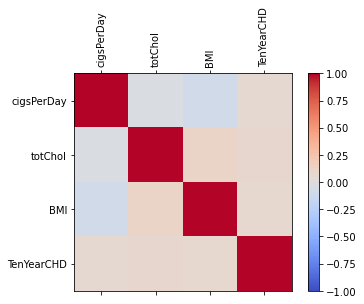

In [23]:
#Correlation in original dataset
corr = original_df.corr()
print(corr)

#Plotting correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(original_df.columns)
ax.set_yticklabels(original_df.columns)
plt.show()

## References
***

[1]: Mahmood, S. S., Levy, D., Vasan, R. S., & Wang, T. J. (2014). The Framingham Heart Study and the epidemiology of cardiovascular disease: a historical perspective. *Lancet* (London, England), 383(9921), 999–1008. https://doi.org/10.1016/S0140-6736(13)61752-3.

[2]: Gallestey, J. Bacallao (2016, April 22). Framingham Heart Study. *Encyclopedia Britannica*. https://www.britannica.com/event/Framingham-Heart-Studay. Access on 4 Dec, 2022.

[3]: *The Framingham Heart Study Official Website*. https://framinghamheartstudy.org/. Access on 4 Dec, 2022.

[4]: Kéry, M., Royle, J. A. (2016). Introduction to Data Simulation. *Applied hierarchical modeling in ecology—Modeling distribution, abundance and species richness using R and BUGS*. Volume 1: Prelude and Static Models. Elsevier, Academic Press. https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation. Access on 4 Dec, 2022.

[5]: Britannica, T. Editors of Encyclopaedia (2011, February 11). stochastic process. *Encyclopedia Britannica*. https://www.britannica.com/science/stochastic-process. Access on 4 Dec, 2022.

[6]: Beckerman, J. (2021). Smoking and Heart Disease. *WebMD*. https://www.webmd.com/heart-disease/smoking-heart-disease. Access on 4 Dec, 2022.

[7]: numpy.random.choice (n.d.). *NumPy Official Documentation*. Retrieved from https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html. Access on 4 Dec, 2022.

[8]: Beckerman, J. (2021). Heart Disease and Lowering Cholesterol. *WebMD*. https://www.webmd.com/heart-disease/guide/heart-disease-lower-cholesterol-risk. Access on 4 Dec, 2022.

[9]: Cholesterol Levels: What You Need to Know (n.d.). *MedLine Plus*. Retrieved from  https://medlineplus.gov/cholesterollevelswhatyouneedtoknow.html. Access on 4 Dec, 2022.

[10]: numpy.random.normal (n.d.). *NumPy Official Documentation*. Retrieved from https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html. Access on 4 Dec, 2022.

[11]: How to generate a random normal distribution of integers (2016). *StackOverflow*. Retrieved from https://stackoverflow.com/questions/37411633/how-to-generate-a-random-normal-distribution-of-integers. Access on 4 Dec, 2022.

[12]: Body Mass Index (BMI) (n.d.). *Centers for Disease Control and Prevention*. Retrieved from https://www.cdc.gov/healthyweight/assessing/bmi/index.html. Access on 4 Dec, 2022.

[13]: Weight: A Silent Heart Risk (n.d.) *Johns Hopkins Medicine*. Retrieved from https://www.hopkinsmedicine.org/health/wellness-and-prevention/weight-a-silent-heart-risk. Access on 4 Dec, 2022.

[14]: scipy.stats.truncnorm (n.d.). *Scipy Official Documentation*. Retrieved from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html. Access on 4 Dec, 2022.

[15]: pandas new column based on multiple conditions code example (n.d.). Retrieved from https://newbedev.com/python-pandas-new-column-based-on-multiple-conditions-code-example. Access on 4 Dec, 2022.

[16]: Samdare, B. (2021). Different ways to create Pandas Dataframe. *GeeksforGeeks*. https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/. Access on 4 Dec. 2022.

[17]: numpy.select (n.d.). *NumPy Official Documentation*. Retrieved from https://numpy.org/doc/stable/reference/generated/numpy.select.html. Access on 4 Dec, 2022.

[18]: What is Considered to Be a “Weak” Correlation? (2021). *Statology*. Retrieved from https://www.statology.org/what-is-a-weak-correlation. Access on 4 Dec, 2022.

***
## End of notebook